In [2]:
import numpy as np
import pandas as pd
from KC_methods import methods
import matplotlib.pyplot as plt

In [3]:
datasets = ["CHEN","INPUT_OUTPUT","LOGISTIC","POLYNOMIAL","RNA_encoded","TIME_SERIES"]

# generate complexities
for data in datasets:
    # df = pd.read_csv(f"results/calculated_datasets/data_{data}.csv",dtype={"x":"string"})
    df = pd.read_csv(f"datasets/input_{data}.csv",dtype={"x":"string"})
    df = df.drop(["K(x)"],axis=1)
    for method in methods:
        df[f"KC_{method}"] = df["x"].apply(methods[method])
        print(f"done with {method} for {data}")
    df.to_csv(f"results/calculated_datasets/data_{data}.csv",index=False)
    print(f"done with {data}")

done with LZ76_adapted for CHEN
done with LZ78 for CHEN
done with CTW for CHEN
done with PLT for CHEN
done with LZ76 for CHEN
done with BDM for CHEN
done with ENTROPY for CHEN
done with CHEN
done with LZ76_adapted for INPUT_OUTPUT
done with LZ78 for INPUT_OUTPUT
done with CTW for INPUT_OUTPUT
done with PLT for INPUT_OUTPUT
done with LZ76 for INPUT_OUTPUT
done with BDM for INPUT_OUTPUT
done with ENTROPY for INPUT_OUTPUT
done with INPUT_OUTPUT
done with LZ76_adapted for LOGISTIC
done with LZ78 for LOGISTIC
done with CTW for LOGISTIC
done with PLT for LOGISTIC
done with LZ76 for LOGISTIC
done with BDM for LOGISTIC
done with ENTROPY for LOGISTIC
done with LOGISTIC
done with LZ76_adapted for POLYNOMIAL
done with LZ78 for POLYNOMIAL
done with CTW for POLYNOMIAL
done with PLT for POLYNOMIAL
done with LZ76 for POLYNOMIAL
done with BDM for POLYNOMIAL
done with ENTROPY for POLYNOMIAL
done with POLYNOMIAL
done with LZ76_adapted for RNA_encoded
done with LZ78 for RNA_encoded
done with CTW for RNA_

In [3]:

def calc_SB(probability_values,complexities):
     df = pd.DataFrame({"y":probability_values,'x':complexities})
     groupmax = df.groupby('x').max().reset_index()
     return np.polyfit(groupmax['x'],np.log10(groupmax['y']),1);

In [4]:
def calc_changes(s:str)-> int:
    res = 0
    for i in range(1,len(s)):
        if s[i] != s[i-1]:
            res+=1
    return res

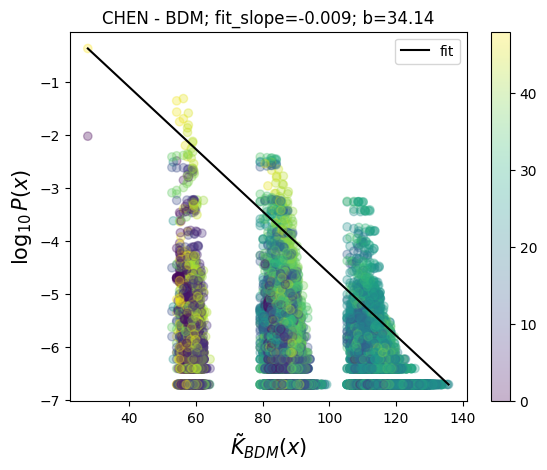

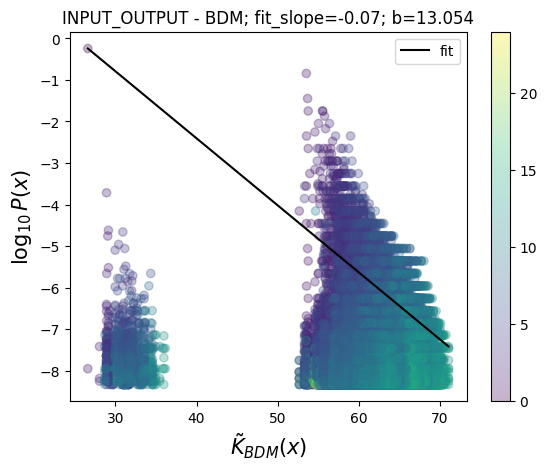

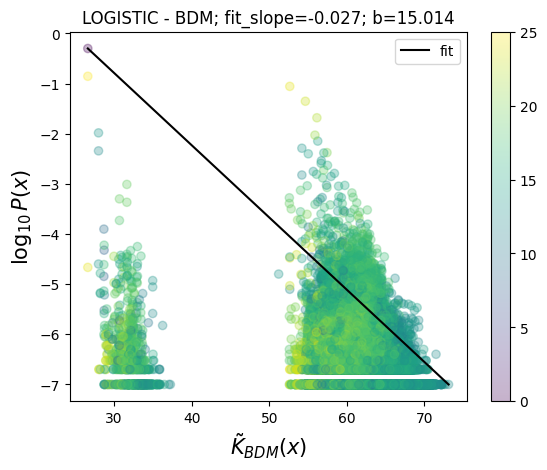

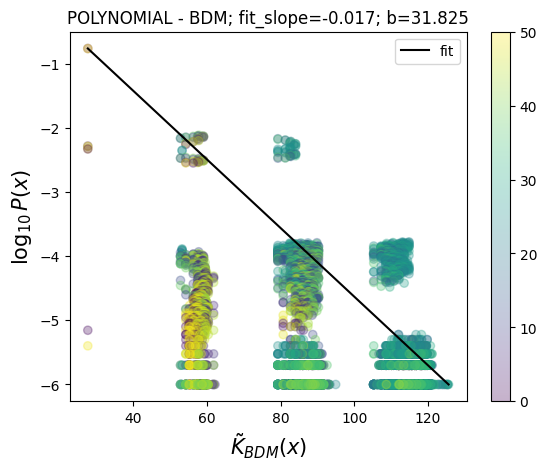

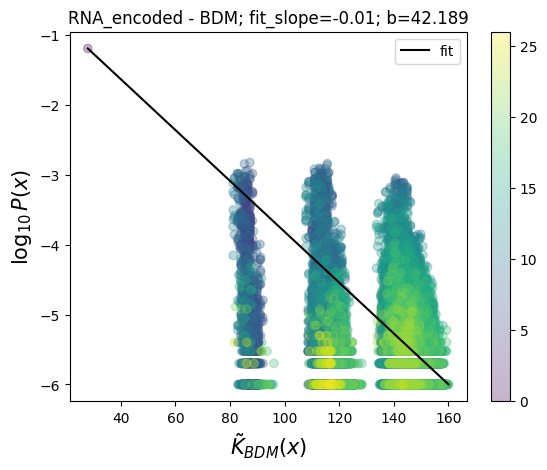

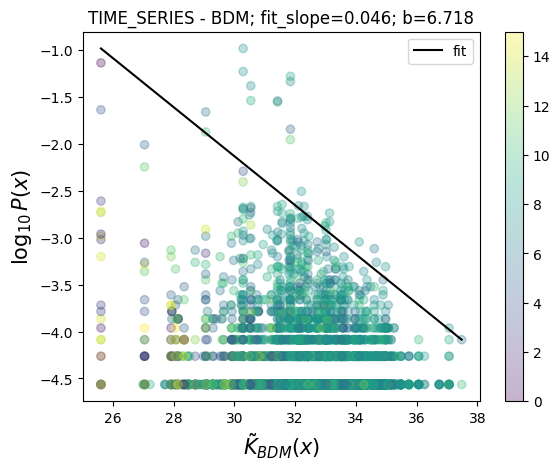

In [6]:

def entropy(string):
    freq = {}
    for c in string:
        if c in freq:
            freq[c] += 1
        else:
            freq[c] = 1
    entropy = 0
    for count in freq.values():
        p = count / len(string)
        entropy -= p * np.log2(p)
    return entropy

datasets = ["CHEN","INPUT_OUTPUT","LOGISTIC","POLYNOMIAL","RNA_encoded","TIME_SERIES"]
for data in datasets:
    import os
    try:
        os.mkdir(f"results/different_maps/entropy/{data}")
    except:
        pass
    df = pd.read_csv(f"results/calculated_datasets/data_{data}.csv",dtype={"x":"string"})
    for method in ["BDM"]:
        # complexities = df[f"KC_{method}"]
        df["KKK"] = df["x"].apply(methods[method])
        complexities = df["KKK"]
        probability_values = df["P(x)"]
        slope, intercept = calc_SB(probability_values,complexities)
        plot_axis = pd.DataFrame({"y":probability_values,'x':complexities})
        groupmax = plot_axis.groupby('x').max().reset_index()
        x1 = groupmax["x"]
        y1 = np.log10(groupmax["y"])
        polyfn = np.poly1d([slope,intercept]) 
        plt.clf()
        # plt.plot(x1,polyfn(x1),c='red',label="fit2")
        log_probabilities = np.log10(probability_values)
        sctr = plt.scatter(complexities,log_probabilities,alpha=0.3,c=df["x"].str.count("1"))
        cbar = plt.colorbar(sctr)
        x = np.array([min(complexities),max(complexities)])
        y = np.log10([max(probability_values),groupmax.iloc[-1]['y']])
        k =np.log10(2**(-x))  
        offset = abs(min(log_probabilities)-min(k))
        if (k[1] > y[1]):
            offset = - offset
        y_k = k + offset

        plt.plot(x,y,c="k",label='fit')
        # plt.plot(x,y_k,c='orange',label=r"$2^{-k}+b$")
        # plt.plot(x,k,c='green',label=r"$2^{-k}$")
        # plt.plot(x,y_k-offset,c='green',label=r"$2^{-k}$")
        plt.legend(loc="upper right")
        plt.title(f"{data} - {method}; fit_slope={slope.round(3)}; b={offset.round(3)}")
        plt.xlabel(r'$\mathit{\tilde{K}_{%s}(x)}$' % method,fontsize=15)
        plt.ylabel(r'$\mathit{\log_{10} P(x)}$',fontsize=15)
        # plt.savefig(f"results/different_maps/entropy/{data}/{data}_{method}.jpg")
        plt.show()
